---
# Análisis comparativo del rendimiento de las 4 tiendas del Sr. Juan.  👨🏻🏪

###**Autor**: Jose Arturo Gomez Eugenio <br>**Fecha**: 13 de Junio del 2025
---
## Introducción  
*Objetivo:* Este informe tiene como propósito apoyar al Sr. Juan en la toma de decisiones sobre cuál de sus cuatro tiendas vender, mediante un análisis detallado de cinco indicadores clave:

1. **Ingresos Totales**: Se analizó la rentabilidad comparando los ingresos de cada local.
2. **Categorías Destacadas**: Se identificaron las líneas de productos con mayores ventas por tienda.
3. **Opiniones de Clientes**: Se evaluó la satisfacción mediante reseñas y calificaciones.
4. **Productos más Vendidos**: Se determinaron los artículos con mayor demanda.
5. **Tiempo de envío**: Se comparó la eficiencia logística a través de los promedios de entrega.

Además, este informe incluye gráficos que permiten una visualización clara de los resultados, y presenta recomendaciones concretas derivadas del análisis.

*Metodología*:  

Datos:  Datasets de las ventas de las 4 tiendas.  

Herramientas:   

* Pandas: Para manipulación de datos.   

* Matplotlib: Para generación de gráficos.

* Folium: Graficas de mapa.

### Importación de datos
Importación de las bibliotecas  y carga de dataset.


In [18]:
!pip install folium
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación


##Facturacion total
Análisis por tienda: En esta sección se evalúa el monto total de facturación de cada tienda a partir de la información registrada.

In [19]:

# Facturación por tienda
facturacion_tienda1 = tienda1['Precio'].sum()
facturacion_tienda2 = tienda2['Precio'].sum()
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f"Tienda 1 facturó: ${facturacion_tienda1:,.2f}")
print(f"Tienda 2 facturó: ${facturacion_tienda2:,.2f}")
print(f"Tienda 3 facturó: ${facturacion_tienda3:,.2f}")
print(f"Tienda 4 facturó: ${facturacion_tienda4:,.2f}")

# Crear un diccionario con los totales
facturaciones = {
    'Tienda 1': facturacion_tienda1,
    'Tienda 2': facturacion_tienda2,
    'Tienda 3': facturacion_tienda3,
    'Tienda 4': facturacion_tienda4
}

# Buscar la tienda con mayor facturación
tienda_mayor = max(facturaciones, key=facturaciones.get)
mayor_valor = facturaciones[tienda_mayor]

print(f"\nLa tienda que más facturó fue: {tienda_mayor} con la cantidad de ${mayor_valor:,.2f}")

Tienda 1 facturó: $1,150,880,400.00
Tienda 2 facturó: $1,116,343,500.00
Tienda 3 facturó: $1,098,019,600.00
Tienda 4 facturó: $1,038,375,700.00

La tienda que más facturó fue: Tienda 1 con la cantidad de $1,150,880,400.00


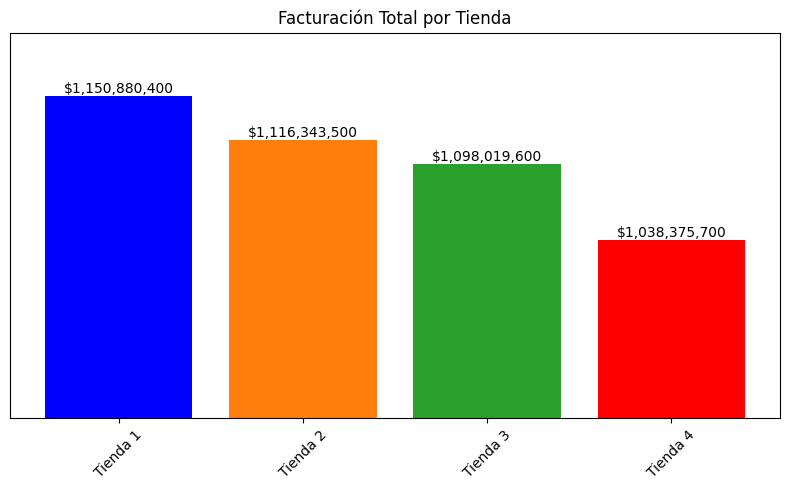

In [29]:
# Nombres de las tiendas (eje x)
tiendas = list(facturaciones.keys())

# Valores de facturación (eje y)
valores_facturacion = list(facturaciones.values())

# Identificación del índice de los valores máximo y mínimo
idx_max = valores_facturacion.index(max(valores_facturacion))
idx_min = valores_facturacion.index(min(valores_facturacion))

# Colores por defecto (diferentes entre sí)
colores = plt.cm.tab10.colors  # Paleta con varios colores distintos

# Asignar un color diferente a cada barra, destacando la mayor y la menor
colores_barras = []
for i in range(len(tiendas)):
    if i == idx_max:
        colores_barras.append('blue')  # Mayor facturación
    elif i == idx_min:
        colores_barras.append('red')    # Menor facturación
    else:
        colores_barras.append(colores[i % len(colores)])

# Creación del gráfico de barras con objeto ax
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(tiendas, valores_facturacion, color=colores_barras)

# Ajustar el rango del eje Y
ax.set_ylim(900000000, 1200000000)

# Título y formato
ax.set_title('Facturación Total por Tienda')
ax.set_xticks(range(len(tiendas)))
ax.set_xticklabels(tiendas, rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_yticks([])  # Oculta los valores del eje Y

# Mostrar los valores encima de cada barra
for i, valor in enumerate(valores_facturacion):
    ax.text(i, valor, f"${valor:,.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

En el gráfico anterior se observa que la Tienda 1 presenta la facturación más alta. No obstante, la diferencia en los niveles de facturación entre las tiendas no es significativamente amplia.

# 2. Ventas por categoría

In [30]:
# Crear diccionario con las tiendas
tiendas = {'Tienda 1': tienda1,
           'Tienda 2': tienda2,
           'Tienda 3': tienda3,
           'Tienda 4': tienda4}

# Imprimir facturación por categoría en cada tienda con formato
for nombre, df in tiendas.items():
    facturacion_categoria = df.groupby('Categoría del Producto')['Precio'].sum()
    print(f"\nFacturación por categoría en {nombre}:")

    for categoria, valor in facturacion_categoria.sort_values(ascending=False).items():
        print(f"  {categoria}: ${valor:,.2f}")

# Crear un DataFrame con la facturación por categoría para cada tienda
facturacion_por_categoria = pd.DataFrame()

for nombre, df in tiendas.items():
    # Agrupar por categoría y sumar la facturación
    facturacion_categoria = df.groupby('Categoría del Producto')['Precio'].sum()
    facturacion_por_categoria[nombre] = facturacion_categoria


Facturación por categoría en Tienda 1:
  Electrónicos: $429,493,500.00
  Electrodomésticos: $363,685,200.00
  Muebles: $187,633,700.00
  Instrumentos musicales: $91,299,000.00
  Deportes y diversión: $39,290,000.00
  Juguetes: $17,995,700.00
  Artículos para el hogar: $12,698,400.00
  Libros: $8,784,900.00

Facturación por categoría en Tienda 2:
  Electrónicos: $410,831,100.00
  Electrodomésticos: $348,567,800.00
  Muebles: $176,426,300.00
  Instrumentos musicales: $104,990,300.00
  Deportes y diversión: $34,744,500.00
  Juguetes: $15,945,400.00
  Artículos para el hogar: $14,746,900.00
  Libros: $10,091,200.00

Facturación por categoría en Tienda 3:
  Electrónicos: $410,775,800.00
  Electrodomésticos: $329,237,900.00
  Muebles: $201,072,100.00
  Instrumentos musicales: $77,380,900.00
  Deportes y diversión: $35,593,100.00
  Juguetes: $19,401,100.00
  Artículos para el hogar: $15,060,000.00
  Libros: $9,498,700.00

Facturación por categoría en Tienda 4:
  Electrónicos: $409,476,100.00

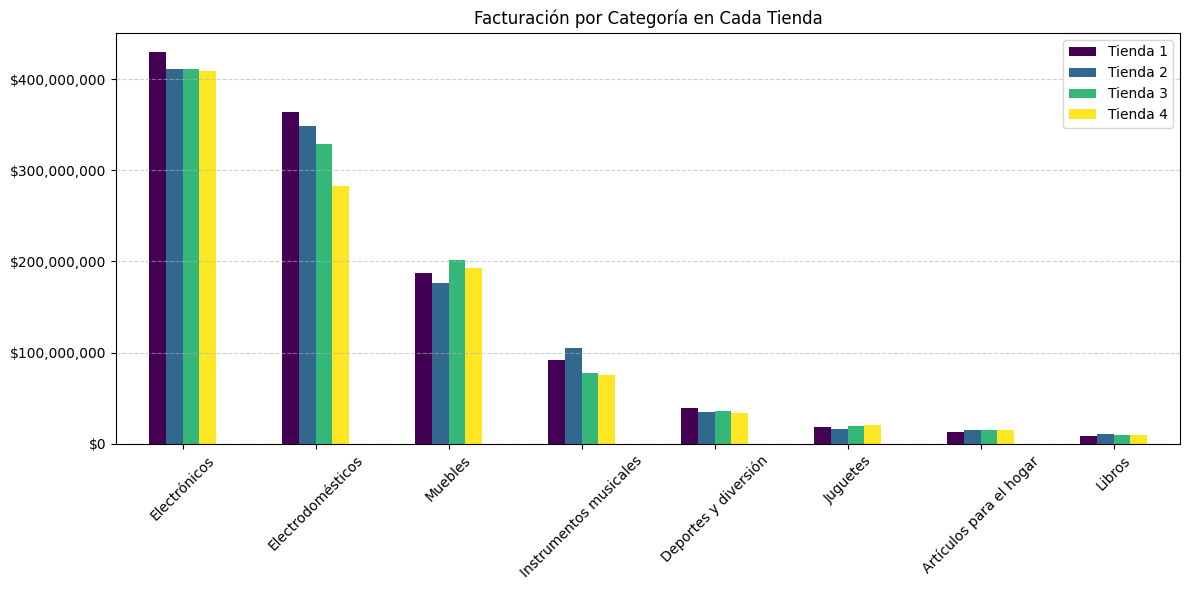

In [32]:

# Ordenar las categorías por facturación total (de mayor a menor)
facturacion_ordenada = facturacion_por_categoria.loc[
    facturacion_por_categoria.sum(axis=1).sort_values(ascending=False).index
]

# Crear gráfico de barras agrupadas
ax = facturacion_ordenada.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Añadir título y etiquetas
plt.title('Facturación por Categoría en Cada Tienda')
ax.set_xlabel('')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Formatear los valores en el eje Y con comas
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${x:,.0f}'))

# Ajustar la disposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Tras examinar la facturación total por categoría de producto en cada tienda, se observa que la categoría **Electrónica** es la que genera mayores ingresos de forma consistente, mientras que la categoría **Libros** presenta los niveles más bajos de facturación.

En particular, Electrónica destaca frente a las demás categorías en términos de ingresos totales, lo cual podría explicarse por el alto valor unitario de sus productos. Esto sugiere que, aunque el volumen de ventas no sea necesariamente el más alto, el precio de cada artículo compensa esta diferencia, resultando en una facturación superior.

# 3. Calificación promedio de la tienda


In [33]:
tiendas = {'Tienda 1': tienda1,
           'Tienda 2': tienda2,
           'Tienda 3': tienda3,
           'Tienda 4': tienda4}

calificaciones_promedio = {}

for nombre, df in tiendas.items():
    promedio_calificacion = df['Calificación'].mean()
    calificaciones_promedio[nombre] = promedio_calificacion
    # Mostrar calificación promedio por tienda
    print(f"Calificación promedio en {nombre}: {promedio_calificacion:.4f}")

Calificación promedio en Tienda 1: 3.9767
Calificación promedio en Tienda 2: 4.0373
Calificación promedio en Tienda 3: 4.0483
Calificación promedio en Tienda 4: 3.9958


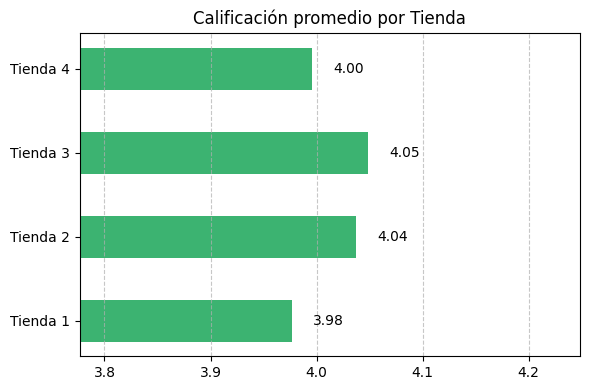

In [45]:
# Datos de las tiendas
tiendas = list(calificaciones_promedio.keys())
valores = list(calificaciones_promedio.values())

# Crear gráfico de barras horizontales
plt.figure(figsize=(6, 4))
bars = plt.barh(tiendas, valores, color='mediumseagreen', height=0.5)

# Ajustar el eje X para mejorar la visibilidad de diferencias
plt.xlim(min(valores) - 0.2, max(valores) + 0.2)

# Título
plt.title('Calificación promedio por Tienda')

# Quitar etiquetas de ejes
plt.xlabel('')
plt.ylabel('')

# Añadir grilla
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar los valores al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}", va='center', ha='left')

# Ajustar la disposición
plt.tight_layout()
plt.show()

El análisis de las calificaciones promedio por tienda revela que la **Tienda 3 registra la puntuación más alta, con un 4.05**, seguida muy de cerca por la Tienda 2, con un promedio de 4.04. La Tienda 4 obtiene una calificación de 4.00, que también refleja un nivel elevado de satisfacción. En contraste, la **Tienda 1 presenta la calificación más baja, con un 3.98**, aunque la diferencia respecto a las demás es mínima.

En términos generales, las calificaciones se mantienen en un rango muy estrecho, entre 3.98 y 4.05, lo que sugiere que los clientes valoran positivamente el servicio ofrecido en todas las tiendas.

# 4. Productos más y menos vendidos

In [46]:
# Crear diccionario con las tiendas
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Mostrar ventas por categoría, categoría más y menos vendida en cada tienda
for nombre, df in tiendas.items():
    ventas_categoria = df['Categoría del Producto'].value_counts()
    total_ventas = ventas_categoria.sum()  # Total de productos vendidos

    print(f"\nVentas por categoría en {nombre}:")
    for categoria, cantidad in ventas_categoria.items():
        print(f"{categoria}: {cantidad}")

    categoria_mas_vendida = ventas_categoria.idxmax()
    ventas_max = ventas_categoria.max()

    categoria_menos_vendida = ventas_categoria.idxmin()
    ventas_min = ventas_categoria.min()

    print(f"Categoría más vendida: {categoria_mas_vendida} ({ventas_max} ventas)")
    print(f"Categoría menos vendida: {categoria_menos_vendida} ({ventas_min} ventas)")
    print(f"Total de productos vendidos: {total_ventas} productos")

# Crear tabla resumen con ventas por categoría en cada tienda
ventas_por_categoria = pd.DataFrame({
    'Tienda 1': tienda1['Categoría del Producto'].value_counts(),
    'Tienda 2': tienda2['Categoría del Producto'].value_counts(),
    'Tienda 3': tienda3['Categoría del Producto'].value_counts(),
    'Tienda 4': tienda4['Categoría del Producto'].value_counts()
}).fillna(0)


Ventas por categoría en Tienda 1:
Muebles: 465
Electrónicos: 448
Juguetes: 324
Electrodomésticos: 312
Deportes y diversión: 284
Instrumentos musicales: 182
Libros: 173
Artículos para el hogar: 171
Categoría más vendida: Muebles (465 ventas)
Categoría menos vendida: Artículos para el hogar (171 ventas)
Total de productos vendidos: 2359 productos

Ventas por categoría en Tienda 2:
Muebles: 442
Electrónicos: 422
Juguetes: 313
Electrodomésticos: 305
Deportes y diversión: 275
Instrumentos musicales: 224
Libros: 197
Artículos para el hogar: 181
Categoría más vendida: Muebles (442 ventas)
Categoría menos vendida: Artículos para el hogar (181 ventas)
Total de productos vendidos: 2359 productos

Ventas por categoría en Tienda 3:
Muebles: 499
Electrónicos: 451
Juguetes: 315
Electrodomésticos: 278
Deportes y diversión: 277
Libros: 185
Instrumentos musicales: 177
Artículos para el hogar: 177
Categoría más vendida: Muebles (499 ventas)
Categoría menos vendida: Instrumentos musicales (177 ventas)
T

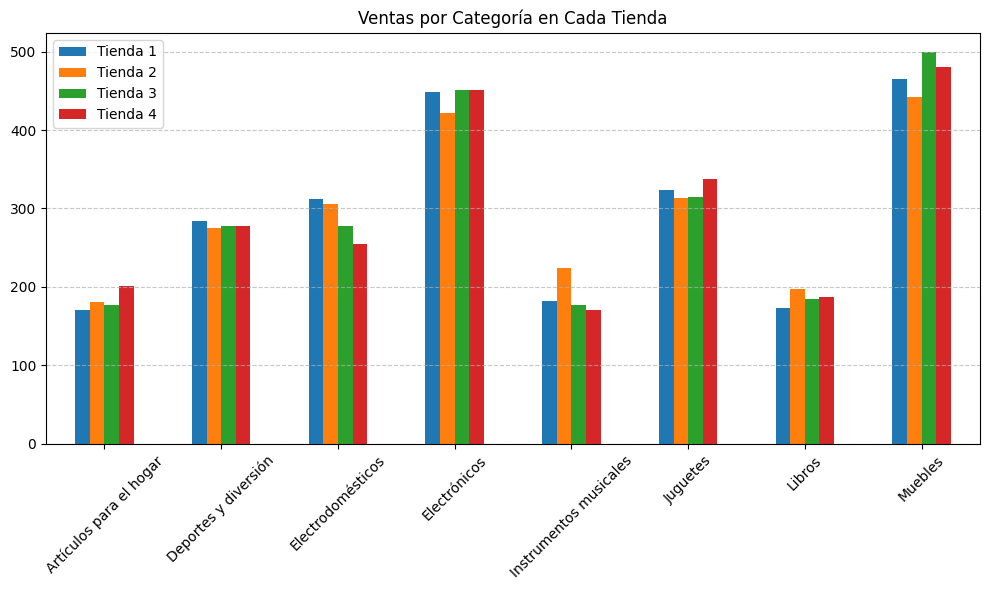

In [47]:
# Crear gráfico de barras agrupadas
ax = ventas_por_categoria.plot(kind='bar', figsize=(10, 6))  # Guarda en 'ax'
plt.title('Ventas por Categoría en Cada Tienda')
ax.set_xlabel('')  # Esto ahora sí funciona porque 'ax' está definido correctamente
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Se observa que **Muebles** y **Electrónica** son las categorías con mayor volumen de ventas en todas las tiendas. En contraste, Instrumentos Musicales y Artículos para el Hogar registran los niveles de venta más bajos.

Aunque Muebles es la categoría más vendida en términos de cantidad, no representa el mayor ingreso, ya que sus productos tienen un precio unitario más bajo en comparación con otras categorías, como Electrónica, cuyos artículos generan mayores ingresos por unidad vendida.

# 5. Envío promedio por tienda

> Agregar bloque entrecomillado



In [48]:
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

costo_envio_promedio = {}

for nombre, df in tiendas.items():
    promedio = df['Costo de envío'].mean()
    costo_envio_promedio[nombre] = promedio
    # Mostrar costo de envío promedio de la tienda
    print(f"Costo de envío promedio en {nombre}: ${promedio:,.2f}")

Costo de envío promedio en Tienda 1: $26,018.61
Costo de envío promedio en Tienda 2: $25,216.24
Costo de envío promedio en Tienda 3: $24,805.68
Costo de envío promedio en Tienda 4: $23,459.46


In [49]:
costo_envio_total = {}

for nombre, df in tiendas.items():
    total = df['Costo de envío'].sum()
    costo_envio_total[nombre] = total
    print(f"Costo de envío total en {nombre}: ${total:,.2f}")

Costo de envío total en Tienda 1: $61,377,900.00
Costo de envío total en Tienda 2: $59,485,100.00
Costo de envío total en Tienda 3: $58,516,600.00
Costo de envío total en Tienda 4: $55,317,400.00


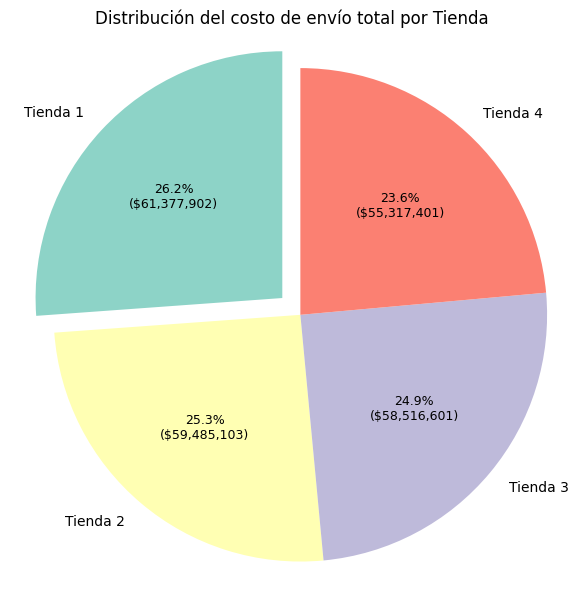

In [52]:
# Datos
labels = list(costo_envio_total.keys())
valores = list(costo_envio_total.values())

# Identificar la tienda con mayor costo de envío para destacarla
explode = [0.1 if v == max(valores) else 0 for v in valores]

# Colores personalizados
colors = plt.cm.Set3.colors

# Crear gráfico de pastel
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    valores,
    labels=labels,
    autopct=lambda pct: f'{pct:.1f}%\n(${int(pct * sum(valores) / 100):,})',
    startangle=90,
    colors=colors,
    explode=explode
)

# Estilo de textos
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(9)

# Título y formato circular
plt.title('Distribución del costo de envío total por Tienda')
plt.axis('equal')
plt.tight_layout()
plt.show()

Se puede observar que el costo de envío entre las tiendas no presenta variaciones significativas. Aunque la **Tienda 1 es la que genera mayores ingresos**, también registra el costo de envío más alto, lo cual resulta coherente considerando su volumen de ventas. En el caso de las demás tiendas, la relación entre ventas y costos de envío se mantiene proporcional, lo que sugiere una distribución equilibrada de la logística.

## indice de eficiencia
Para evaluar el rendimiento de cada tienda desde una perspectiva logística y financiera, se calcula un índice de eficiencia, el cual relaciona los ingresos generados con el costo total de envío. Esta métrica permite estimar cuántos pesos se facturan por cada peso invertido en logística, brindando una visión clara sobre la rentabilidad operativa respecto al gasto en transporte.

La fórmula aplicada es la siguiente:

$$ \text{Índice de eficiencia} = \frac{\text{Ventas Totales}}{\text{Costo de Envío Total}} $$

Este indicador es comúnmente utilizado en estudios de eficiencia logística, ya que permite comparar unidades de negocio con estructuras de costo similares (Ballou, 2004).

En este análisis se consideran tres variables clave:

*   **Ingresos totales:** Corresponden a las ventas generadas por cada tienda.
*   **Costo total de envío:** Representa los gastos logísticos asociados al transporte de productos.
*   **Índice de eficiencia:** Mide la relación entre ingresos y costos de envío, ofreciendo una herramienta útil para comparar el desempeño entre tiendas desde el punto de vista económico-logístico.

In [53]:
# Calcular el índice de eficiencia
indice_eficiencia = {}
for nombre in costo_envio_total:
    ventas = facturaciones.get(nombre, 0)
    costo_envio = costo_envio_total[nombre]
    indice_eficiencia[nombre] = ventas / costo_envio if costo_envio != 0 else 0

# Imprimir el índice de eficiencia por tienda
print("Índice de eficiencia por tienda:\n")
for nombre, indice in indice_eficiencia.items():
    print(f"{nombre}: {indice:.2f} pesos facturados por cada peso en envío")

# Identificar la tienda con el peor rendimiento (índice más bajo)
tienda_peor = min(indice_eficiencia, key=indice_eficiencia.get)

print(f"\nLa tienda con el índice de eficiencia más bajo es: {tienda_peor}")

Índice de eficiencia por tienda:

Tienda 1: 18.75 pesos facturados por cada peso en envío
Tienda 2: 18.77 pesos facturados por cada peso en envío
Tienda 3: 18.76 pesos facturados por cada peso en envío
Tienda 4: 18.77 pesos facturados por cada peso en envío

La tienda con el índice de eficiencia más bajo es: Tienda 1


**Interpretación**

Los resultados muestran que la Tienda 1 presenta el índice de eficiencia más bajo, lo que indica que, proporcionalmente, es la que genera menos ingresos por cada peso invertido en envíos.

No obstante, la diferencia entre su índice y el de las demás tiendas es marginal (inferior a 0.02 puntos), por lo que esta variación no representa una señal suficiente para justificar una acción drástica, como cerrar o vender la tienda.

Adicionalmente, es importante destacar que la Tienda 1 es la que reporta los mayores ingresos totales, lo cual constituye un indicador sólido de su buen desempeño comercial, a pesar de su ligera desventaja en eficiencia logística.

#Análisis del desempeño geográfico

In [54]:
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unimos todas las tiendas en un solo DataFrame
df_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# se asegura que no haya valores nulos en lat/lon
df_tiendas = df_tiendas.dropna(subset=['lat', 'lon'])

# Crear mapa centrado en el promedio de coordenadas
m = folium.Map(location=[df_tiendas['lat'].mean(), df_tiendas['lon'].mean()], zoom_start=6)

# Crear datos para el mapa de calor (lat, lon, intensidad = precio de venta)
heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in df_tiendas.iterrows()]

# Añadir el mapa de calor
HeatMap(heat_data, radius=13).add_to(m)

# Mostrar el mapa
m

Podemos evidenciar cuales ciudades generan mas ingreso:

In [56]:
# Agrupar las ventas por ciudad y tienda
ventas_por_ciudad_tienda = df_tiendas.groupby(['Lugar de Compra', 'Tienda'])['Precio'].sum().unstack(fill_value=0)

# Calcular el total de ventas por ciudad
ventas_por_ciudad_tienda['Total por Ciudad'] = ventas_por_ciudad_tienda.sum(axis=1)

# Ordenar por el total de ventas (de mayor a menor)
ventas_por_ciudad_tienda_ordenado = ventas_por_ciudad_tienda.sort_values(by='Total por Ciudad', ascending=False)

# Aplicar formato con separadores de miles y símbolo de pesos, SIN usar applymap
ventas_formateadas = ventas_por_ciudad_tienda_ordenado.apply(lambda col: col.map(lambda x: f"${x:,.2f}"))

# Renombrar el índice (opcional)
ventas_formateadas.index.name = 'Ciudad'

# Mostrar resultado limpio
print("Ventas totales por ciudad y tienda:\n")
print(ventas_formateadas)

Ventas totales por ciudad y tienda:

Tienda                Tienda 1         Tienda 2         Tienda 3  \
Ciudad                                                             
Bogotá         $440,005,000.00  $479,959,200.00  $475,562,100.00   
Medellín       $296,858,100.00  $297,246,700.00  $250,580,600.00   
Cali           $154,493,700.00  $118,257,600.00  $109,287,600.00   
Pereira         $56,214,300.00   $43,073,800.00   $62,504,500.00   
Barranquilla    $32,907,700.00   $27,741,300.00   $36,768,500.00   
Cartagena       $22,296,700.00   $21,548,300.00   $34,144,100.00   
Cúcuta          $37,879,500.00   $28,991,500.00   $25,165,500.00   
Bucaramanga     $17,579,200.00   $23,895,600.00   $23,538,900.00   
Riohacha        $18,512,700.00   $12,656,400.00   $19,025,900.00   
Leticia         $14,669,800.00   $16,159,000.00   $19,212,800.00   
Santa Marta     $13,198,300.00   $13,829,300.00   $12,854,300.00   
Pasto           $14,996,400.00   $12,800,100.00    $6,801,300.00   
Neiva      

Se puede observar que las principales ciudades de Colombia son las que generan mayores ingresos por ventas. Este comportamiento es consistente con lo esperado, ya que en las ciudades más grandes existe una mayor concentración de consumidores, niveles de ingreso más elevados y, en consecuencia, un mayor poder adquisitivo, lo que se traduce en un volumen de consumo superior.

# Conclusión.
Tras un análisis integral que consideró ingresos por tienda, categorías de productos, calificaciones de clientes, productos más vendidos y eficiencia logística, se concluye que la Tienda 4 es la opción más adecuada para ser vendida por el Sr. Juan.

Aunque las diferencias entre tiendas son en su mayoría mínimas, destacan los siguientes hallazgos clave:

*   **Ingresos totales:** La Tienda 4 registra el menor nivel de ingresos, por lo que su venta tendría el menor impacto en la rentabilidad general del negocio.
*   **Costo de envío y eficiencia:** Los indicadores logísticos muestran una distribución uniforme entre tiendas, sin ventajas significativas que justifiquen conservar la Tienda 4 frente a las demás.
*   **Satisfacción del cliente:** Las calificaciones son altas y bastante similares en todas las ubicaciones, por lo que este factor no representa una desventaja competitiva directa.
*   **Análisis por ciudad y categoría:** Aunque útil para comprender la dinámica del mercado, no se identificaron diferencias lo suficientemente marcadas como para alterar la decisión.

**💡 Recomendación final**

En un escenario donde los indicadores clave son equilibrados, la estrategia más racional es desprenderse de la tienda con menor aporte económico, es decir, la Tienda 4. Esta decisión permite al Sr. Juan preservar el rendimiento operativo de su red comercial y enfocar recursos en las ubicaciones con mayor potencial.
